In [2]:
##############################################################################
import sys
path = "C:\\Users\\Paul Valcke\\Documents\\GitHub\\GEMMES" 
sys.path.insert(0, path)
import pygemmes as pgm
import numpy as np

from itables import init_notebook_mode
import itables.options as opt
init_notebook_mode(all_interactive=True)
%matplotlib widget

from IPython.display import display,HTML,Markdown
from IPython.display import IFrame

opt.columnDefs = [{"className": "dt-left", "targets": "_all"}]
opt.classes="display nowrap compact"
opt.scrollY="500px"
opt.scrollCollapse=True
opt.paging=False
##############################################################################

def pretty(d, indent=0):
   for key, value in d.items():
      print('\t' * indent + str(key))
      if isinstance(value, dict):
         pretty(value, indent+1)
      else:
         print('\t' * (indent+1) + str(value))


pyIDEE

* Version 0.9
* Last update 2023/01/03
* Developped at the environmental justice program https://environmentaljustice.georgetown.edu/#
* Contact : Paul Valcke pv229@georgetown.edu

Welcome in PyIDEE, a modular library to prototype and study dynamical systems !
This library is oriented toward generation of macroeconomic complexity models

If you find bugs, want some new extensions, or help us improve the library, please create a new issue on github
If this is the first time you open this library, please look at the tutorial file in doc/tutorial.py or better, and execute it line by line.

The ipythonNotebook is at : C:\Users\Paul Valcke\Documents\GitHub\GEMMES\pygemmes\doc\TUTORIALS\TUTORIAL.ipynb
If you want to customize pyIDEE (advancer users) like removing this message, edit : C:\Users\Paul Valcke\Documents\GitHub\GEMMES\pygemmes\_config.py


<IPython.core.display.Javascript object>

# Generating N-sectoral system at equilibrium 

we do consider that u=1, i=0 for the moment

We determine randomly :
* the content of the intermediate consumption matrix $\Gamma$
* the content of the capital composition matrix $\Xi$
* the structure of the consumption vector $C^{pond}$ (summing to 1)
* the local wage ponderation $w$
* the local productivity per worker $a$

## Generating N synchronized Goodwin in parrallel 

We start with N Goodwin with everything in Parrallel BUT the Philips curve. 

Pop
Tmax [100.]
Tini [0.]
dt [0.1]
Nprod ['0', '1', '2']
N [3.33333333]
w0 [0.75]
a0 [3.]
D [0.]
Dh [0.]
V [1.]
K [6.75906183]
p [1. 1. 1.]
z [1.]
apond [1.]
alpha [0.025]
n [0.02]
delta [0.005]
eta [0.]
mu0 [1.]
chi [0.]
gammai [0.]
r [0.03]
philinConst [-0.292]
philinSlope [0.469]
Delta [0.]
k0 [0.]
k1 [1.]
A [0.33333333]
CESexp [100.]
b [0.5]
Xi [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
Gamma [[0.1 0.  0. ]
 [0.  0.1 0. ]
 [0.  0.  0.1]]
Cpond [0.33333333]
sigma [1]
a [3.]
w [0.75]
employment [0.67590618]

Changing Dimensions: ['Nprod']
Changing Fields: ['Tini', 'N', 'w0', 'a0', 'D', 'Dh', 'V', 'K', 'p', 'z', 'apond', 'alpha', 'n', 'delta', 'eta', 'mu0', 'chi', 'gammai', 'r', 'philinConst', 'philinSlope', 'Delta', 'k0', 'k1', 'CESexp', 'b', 'Xi', 'Gamma', 'Cpond']
Changes Ignored:['A', 'sigma', 'a', 'w', 'employment', 'Tmax', 'dt']
Now Nprod has 3 sectors with names ['0', '1', '2']

time step 754 / 1000
time step 1000 / 1000


C:\Users\Paul Valcke\Documents\GitHub\GEMMES\pygemmes\_plots\_plots.py:204: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  fig.tight_layout()


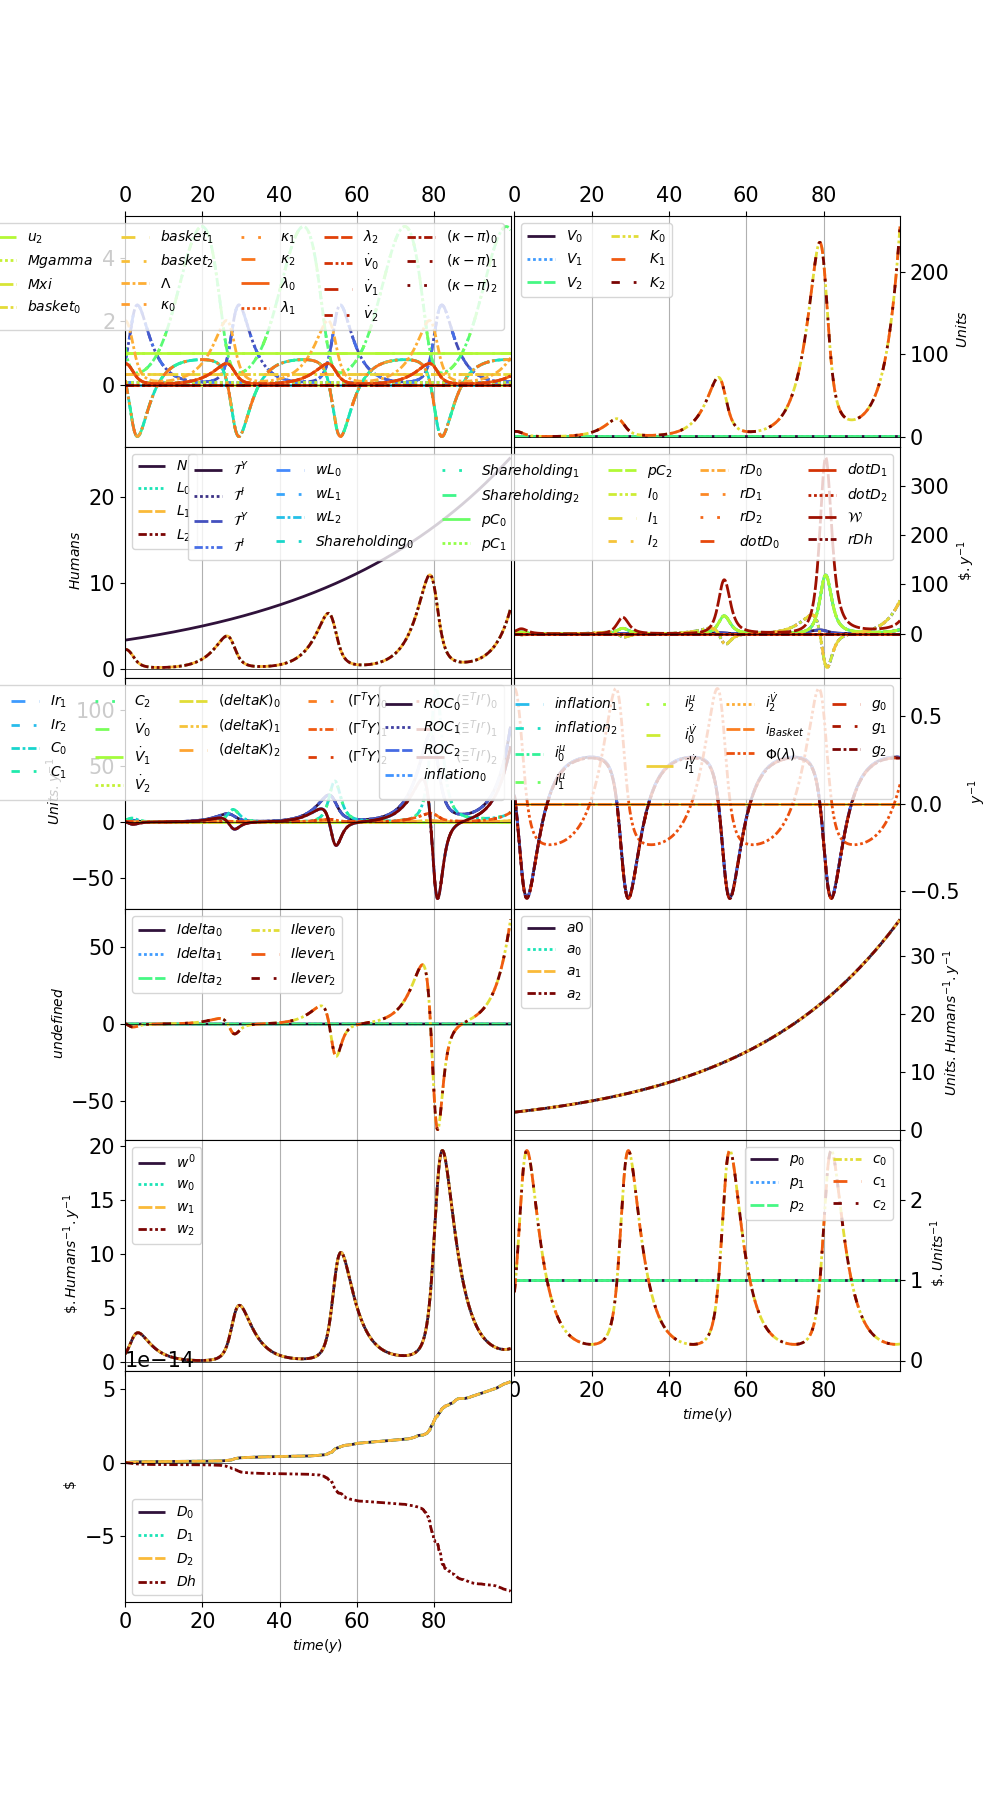

In [23]:
hub=pgm.Hub('CHIMES0',verb=False)
dparam0 = hub.supplements['generateNgoodwin'](3) 

dparam0['employment']= (dparam0['alpha']-dparam0['philinConst'])/dparam0['philinSlope']

#a=[print(k,v,'\n') for k,v in dparam0.items()]
dparam0['p'] = hub.supplements['pForROC'](dparam0)
dparam0['K']*=dparam0['employment']*dparam0['N']/np.sum(dparam0['K']/dparam0['a']) # homotetic scaling for employment and N


for k,v in dparam0.items():
    print(k,v)
hub.set_dparam(**dparam0,verb=True) 
hub.set_dparam('Tmax',100,verb=False) 
#hub.get_summary()

hub.run()
hub.plot()

In [17]:

hub=pgm.Hub('CHIMES0',verb=False)

########################################################
Nsect       = 5     # Number of sectors

gamma0      = 0.1   # Mean intermediate consumption
sigmagamma  = .5    # standard deviation on intermediate consumption

xi0         = 1     # Mean capital size 
sigmaxi     = .5    # standard deviation on capital size

apondscale = .3
wpondscale = .3
########################################################

### GENERATION
print('Hop')
dparam0 = hub.supplements['generateNgoodwin'](Nsect) #Basic N Goodwin dictionnary 

# vector equivalent for wage and productivity 
dparam0['apond'] = np.random.normal(1,scale=apondscale,size=Nsect)
dparam0['z']     = np.random.normal(1,scale=wpondscale,size=Nsect)

dparam0['a'] = dparam0['a0']*dparam0['apond']
dparam0['w'] = dparam0['w0']*dparam0['z']

### MATRICES AND CONSUMPTION VECTOR (HERE RANDOM)
dparam0['Gamma'] = np.random.lognormal(size=(Nsect,Nsect))   
dparam0['Gamma']*= gamma0/np.sum(dparam0['Gamma'],axis=1)[:, np.newaxis]
dparam0['Gamma']*= (1+np.random.normal(scale=sigmagamma,size=Nsect ))[:, np.newaxis]

dparam0['Xi'] = np.random.lognormal(size=(Nsect,Nsect)) 
dparam0['Xi']*= xi0/np.sum(dparam0['Xi'],axis=1)[:, np.newaxis]
dparam0['Xi']*= (1+np.random.normal(scale=sigmaxi,size=Nsect ))[:, np.newaxis]

dparam0['Cpond'] = np.random.lognormal(size=Nsect) 
dparam0['Cpond']/= np.sum(dparam0['Cpond'])

Hi !
Hi !
Hi !
Pop
Hop
Hi !


## Same with fixed values

In [26]:
hub=pgm.Hub('CHIMES0',verb=False)
dparam0 = hub.supplements['generateNgoodwin'](3) #Basic N Goodwin dictionnary
dparam0['a'] = dparam0['a0']*dparam0['apond']
dparam0['w'] = dparam0['w0']*dparam0['z']
dparam0['Nprod']= ['Consumption','Intermediate','Investment']
dparam0['Gamma']= [[0. ,0.1,0],
                   [0. ,0.1,0],
                   [0. ,0.1,0]]
dparam0['Xi']   = [[0. ,0. ,1],
                   [0. ,0. ,1],
                   [0. ,0. ,1]]
dparam0['Cpond'] = np.array([1,0,0])

In [29]:
### Employment to no wage share change through Philips curve
dparam0['employment']= (dparam0['alpha']-dparam0['philinConst'])/dparam0['philinSlope'] # Linear Philips
#dparam0['employment']= 1 - np.sqrt(dparam0['phi1']/(dparam0['phi0']+dparam0['alpha'])) # Divergent Philips

### Price to ensuire ROC to be the natural growth rate of society
dparam0['p'] = hub.supplements['pForROC'](dparam0)
dparam0['p']*=1.1
### Capital composition to be sure that dotV=0 then scaling for employment and N 
K= hub.supplements['Kfor0dotV'](dparam0)
K*=dparam0['employment']*dparam0['N']/np.sum(K/dparam0['a']) # homotetic scaling for employment and N
dparam0['K']= K



In [33]:
dparam0['chi']=0.01


Changing Dimensions: ['Nprod', 'nx', 'nr']
Changing Fields: ['Tini', 'N', 'w0', 'a0', 'D', 'Dh', 'V', 'K', 'p', 'z', 'apond', 'alpha', 'n', 'delta', 'eta', 'mu0', 'chi', 'gammai', 'r', 'philinConst', 'philinSlope', 'Delta', 'k0', 'k1', 'CESexp', 'b', 'Xi', 'Gamma', 'Cpond']
Changes Ignored:['A', 'sigma', 'a', 'w', 'employment', 'Tmax', 'dt']
ISSUE : YOU CHANGE nx while K has specific values on it
ISSUE : YOU CHANGE nx while Gamma has specific values on it
ISSUE : YOU CHANGE nx while Xi has specific values on it
ISSUE : YOU CHANGE nx while Cpond has specific values on it
Now Nprod has 3 sectors with names ['Consumption', 'Intermediate', 'Investment']
Now nx has 1 sectors with names ['']
Now nr has 1 sectors with names ['']
Identified chi as a value change on all axes

time step 713 / 1000
time step 1000 / 1000


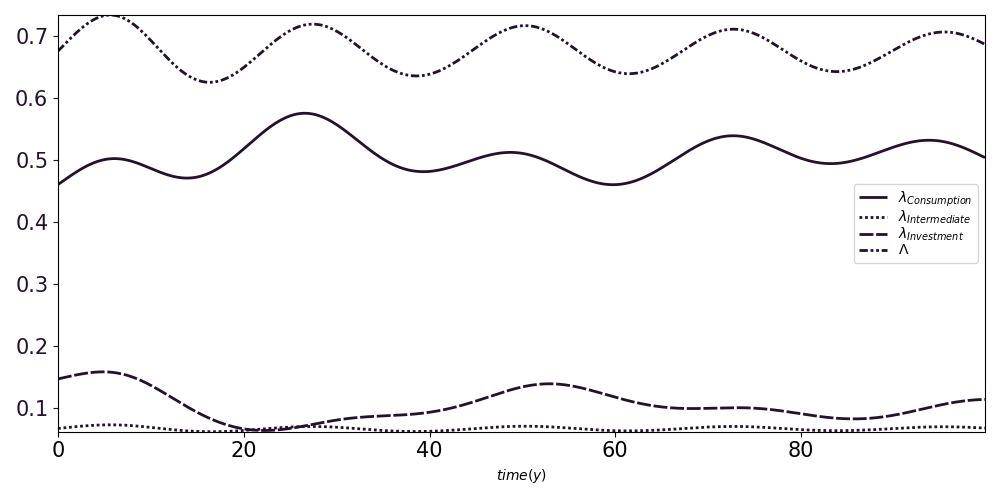

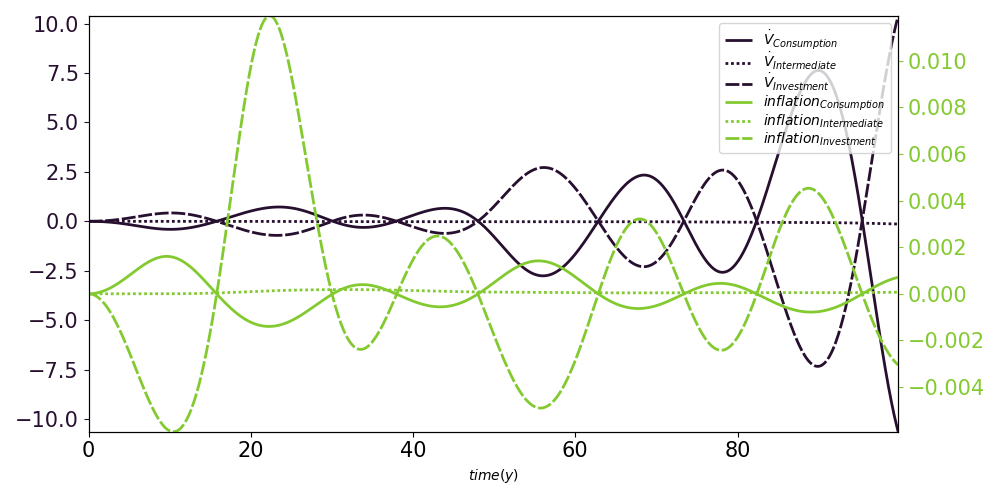

In [34]:
# RUN AND PLOT 
hub.set_dparam(**dparam0,verb=True) 
hub.set_dparam('Tmax',100,verb=False) 

hub.run()
#hub.plot()
#hub.supplements['PiRepartition'](hub)
#hub.supplements['PhysicalFluxes'](hub)
#hub.supplements['MonetaryFluxes'](hub)
pgm.plots.Sankey(hub)

#print([['employment',i] for i in hub.dparam['Nprod']['list']])
# Looking at employment variation
pgm.plots.plotnyaxis(hub,y=[[['employment',i] for i in hub.dparam['Nprod']['list']]+['employmentAGG']])
pgm.plots.plotnyaxis(hub,y=[[['dotV',i] for i in hub.dparam['Nprod']['list']],
                            [['inflation',i] for i in hub.dparam['Nprod']['list']]])